 
## <span style='color:#5499C7 '> Importing libraries  </span>


In [1]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings
pd.options.mode.chained_assignment = None
pd.options.display.max_columns=100
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


 
## <span style='color:#5499C7 '> Loading to dataframe </span>


In [2]:
dataset_path = '../input/seoul-bike-rental-ai-pro-iti/'


df_train = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
df_test = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
print("Shape before deleting duplicate values: {}.\n\n".format(df_train.shape))

# Removing duplicate rows if any
df_train=df_train.drop_duplicates()
print("Shape After deleting duplicate values: {}.\n\n".format(df_train.shape))

df_train.head()


Shape before deleting duplicate values: (5760, 15).


Shape After deleting duplicate values: (5760, 15).




,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


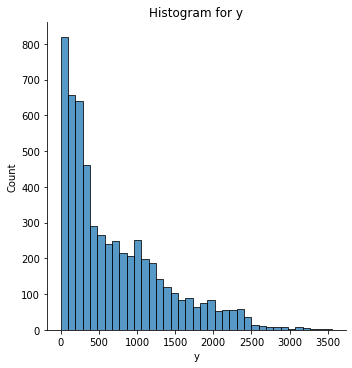

In [3]:
sns.displot(df_train['y'], kde = False)
plt.title("Histogram for y")
plt.show()

In [4]:
#get unique values 
df_train.apply(lambda x: len (x.unique()))

ID                           5760
Date                          240
y                            1890
Hour                           24
Temperature(�C)               515
Humidity(%)                    86
Wind speed (m/s)               63
Visibility (10m)             1584
Dew point temperature(�C)     516
Solar Radiation (MJ/m2)       340
Rainfall(mm)                   45
Snowfall (cm)                  36
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [5]:
df_train.dtypes

ID                             int64
Date                          object
y                              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [6]:
#check if null 
df_train.isnull().sum()


ID                           0
Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

 
## <span style='color:#5499C7 '> Feature Engineering </span>


In [7]:
#Rename the columns
df_train.rename(columns={'Temperature(�C)':'Temperature','Dew point temperature(�C)':'Dptempe'},inplace=True)
df_test.rename(columns={'Temperature(�C)':'Temperature','Dew point temperature(�C)':'Dptempe'},inplace=True)

In [8]:
# change date to day month year 
df_train["weekday"] = df_train.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%d/%m/%Y").weekday()])
df_train["month"] = df_train.Date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%d/%m/%Y").month])
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_train['year'] = df_train["Date"].dt.year
df_train= df_train.drop(['Date'],axis=1)

df_test["weekday"] = df_test.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%d/%m/%Y").weekday()])
df_test["month"] = df_test.Date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%d/%m/%Y").month])
df_test["Date"] = pd.to_datetime(df_test["Date"])
df_test['year'] = df_test["Date"].dt.year
df_test= df_test.drop(['Date'],axis=1)



 
#### <span style='color:#5499C7 '> since 'Dew point temperature(�C) is Dependent variable drived feature as Td = T - ((100 - RH)/5.) </span>


In [9]:

df_train= df_train.drop(['Dptempe'],axis=1)
df_test= df_test.drop(['Dptempe'],axis=1)

In [10]:
df_train.head(5)


,ID,y,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,month,year
0,0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
2,2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
3,3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
4,4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017


In [11]:
#change object to category 
categoryVariableList = ["Hour","Seasons","Holiday","Functioning Day","weekday","month","year"]
for cat in categoryVariableList:
    df_train[cat] = df_train[cat].astype("category")
    df_test[cat]  = df_test[cat].astype("category")
    


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       5760 non-null   int64   
 1   y                        5760 non-null   int64   
 2   Hour                     5760 non-null   category
 3   Temperature              5760 non-null   float64 
 4   Humidity(%)              5760 non-null   int64   
 5   Wind speed (m/s)         5760 non-null   float64 
 6   Visibility (10m)         5760 non-null   int64   
 7   Solar Radiation (MJ/m2)  5760 non-null   float64 
 8   Rainfall(mm)             5760 non-null   float64 
 9   Snowfall (cm)            5760 non-null   float64 
 10  Seasons                  5760 non-null   category
 11  Holiday                  5760 non-null   category
 12  Functioning Day          5760 non-null   category
 13  weekday                  5760 non-null   category
 14  month   

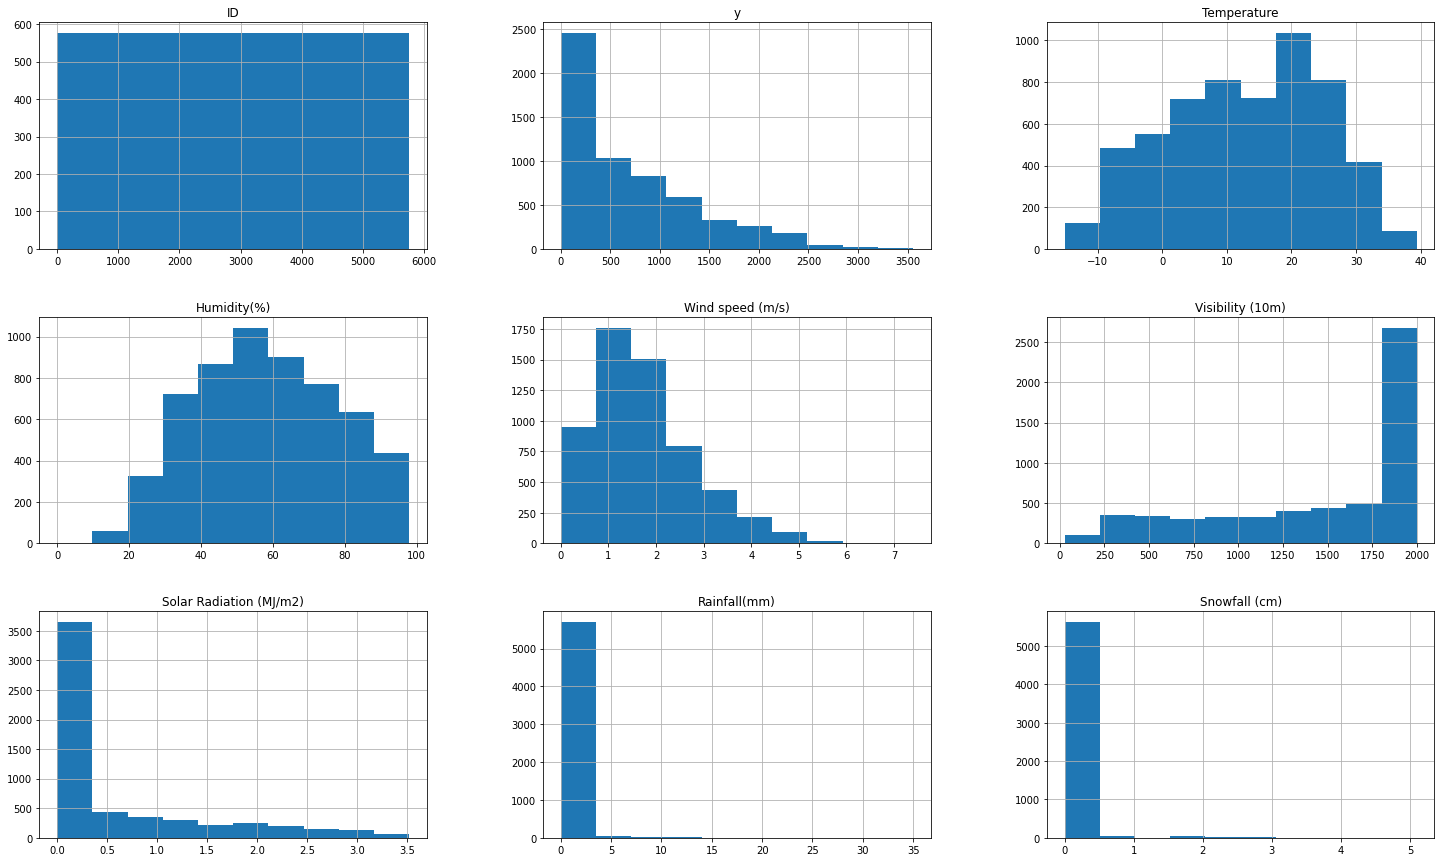

In [13]:
df_train.hist(figsize=(25, 15))
plt.show()



In [14]:
df_train.describe()

,ID,y,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,12.803559,58.361806,1.723333,1473.711458,0.572325,0.135122,0.046302
std,1662.913107,655.249491,11.902206,19.840167,1.047898,585.879880,0.869943,1.075320,0.323728
min,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,3.200000,43.000000,0.900000,1025.750000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,13.700000,57.000000,1.500000,1732.000000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,22.225000,73.000000,2.300000,2000.000000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,5.100000


 
## <span style='color:#5499C7 '> Wind speed (m/s) </span>


[Text(0.5, 0, 'Windspeed Values'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count Of Windspeed Values After Imputing'),
 None]

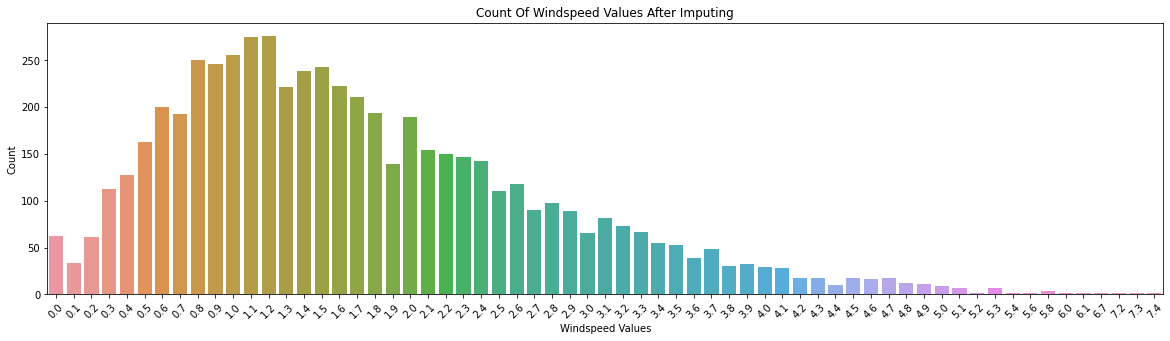

In [15]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
windspeed = pd.DataFrame(df_train["Wind speed (m/s)"].value_counts()).reset_index()
plt.xticks(rotation=45) 
sns.barplot(data=windspeed,x="index",y="Wind speed (m/s)",ax=ax)
ax.set(xlabel='Windspeed Values', ylabel='Count',title="Count Of Windspeed Values After Imputing",label='big')

 
## <span style='color:#5499C7 '> Winds on the Beaufort scale </span>


In [16]:
"""# now change the value of wind speed  to 12 category in train 
df_train.loc[ (df_train['Wind speed (m/s)']< 0.3) , 'Wind speed (m/s)'] = 0 #Calm #nothing
df_train.loc[ (df_train['Wind speed (m/s)']>= 0.3) & (df_train['Wind speed (m/s)']<=1.5) , 'Wind speed (m/s)']   = 1 #Light air #Diversion of smoke
df_train.loc[ (df_train['Wind speed (m/s)']>= 1.6) & (df_train['Wind speed (m/s)']<=3.3) , 'Wind speed (m/s)']  = 2  #Light breeze #Contractions of leaves
df_train.loc[ (df_train['Wind speed (m/s)']>= 3.4) & (df_train['Wind speed (m/s)']<=5.4) , 'Wind speed (m/s)'] = 3  #Gentle breeze #Movement of branches
df_train.loc[ (df_train['Wind speed (m/s)']>= 5.5) & (df_train['Wind speed (m/s)']<=7.9) , 'Wind speed (m/s)']   = 4 #Moderate breeze #Movement of limbs
df_train.loc[ (df_train['Wind speed (m/s)']>= 8.0) & (df_train['Wind speed (m/s)']<=10.7) , 'Wind speed (m/s)']  = 5 #Fresh breeze #Movement of small trees
df_train.loc[ (df_train['Wind speed (m/s)']>= 10.8) & (df_train['Wind speed (m/s)']<=13.8) , 'Wind speed (m/s)'] = 6 #Strong breeze #Movement strong branches
df_train.loc[ (df_train['Wind speed (m/s)']>= 13.9) & (df_train['Wind speed (m/s)']<=17.1) , 'Wind speed (m/s)']   = 7  #High wind #Movement of trees
df_train.loc[ (df_train['Wind speed (m/s)']>= 17.2) & (df_train['Wind speed (m/s)']<=20.7) , 'Wind speed (m/s)']  = 8  #Gale #Difficulty in walking
df_train.loc[ (df_train['Wind speed (m/s)']>= 20.8) & (df_train['Wind speed (m/s)']<=24.4) , 'Wind speed (m/s)'] = 9 #String gale #House damage
df_train.loc[ (df_train['Wind speed (m/s)']>= 24.5) & (df_train['Wind speed (m/s)']<=28.4) , 'Wind speed (m/s)']   = 10  #Storm #Uprooting of trees
df_train.loc[ (df_train['Wind speed (m/s)']>= 28.5) & (df_train['Wind speed (m/s)']<=32.6) , 'Wind speed (m/s)']  = 11  #Violent storm #Storm damage
df_train.loc[ (df_train['Wind speed (m/s)']>= 32.7), 'Wind speed (m/s)'] = 12 #Hurricane #Devastation

df_train['Wind speed (m/s)'] = df_train['Wind speed (m/s)'].astype(int)
#on test data 

df_test.loc[ (df_test['Wind speed (m/s)']< 0.3) , 'Wind speed (m/s)'] = 0 #Calm #nothing
df_test.loc[ (df_test['Wind speed (m/s)']>= 0.3) & (df_test['Wind speed (m/s)']<=1.5) , 'Wind speed (m/s)']   = 1 #Light air #Diversion of smoke
df_test.loc[ (df_test['Wind speed (m/s)']>= 1.6) & (df_test['Wind speed (m/s)']<=3.3) , 'Wind speed (m/s)']  = 2  #Light breeze #Contractions of leaves
df_test.loc[ (df_test['Wind speed (m/s)']>= 3.4) & (df_test['Wind speed (m/s)']<=5.4) , 'Wind speed (m/s)'] = 3  #Gentle breeze #Movement of branches
df_test.loc[ (df_test['Wind speed (m/s)']>= 5.5) & (df_test['Wind speed (m/s)']<=7.9) , 'Wind speed (m/s)']   = 4 #Moderate breeze #Movement of limbs
df_test.loc[ (df_test['Wind speed (m/s)']>= 8.0) & (df_test['Wind speed (m/s)']<=10.7) , 'Wind speed (m/s)']  = 5 #Fresh breeze #Movement of small trees
df_test.loc[ (df_test['Wind speed (m/s)']>= 10.8) & (df_test['Wind speed (m/s)']<=13.8) , 'Wind speed (m/s)'] = 6 #Strong breeze #Movement strong branches
df_test.loc[ (df_test['Wind speed (m/s)']>= 13.9) & (df_test['Wind speed (m/s)']<=17.1) , 'Wind speed (m/s)']   = 7  #High wind #Movement of trees
df_test.loc[ (df_test['Wind speed (m/s)']>= 17.2) & (df_test['Wind speed (m/s)']<=20.7) , 'Wind speed (m/s)']  = 8  #Gale #Difficulty in walking
df_test.loc[ (df_test['Wind speed (m/s)']>= 20.8) & (df_test['Wind speed (m/s)']<=24.4) , 'Wind speed (m/s)'] = 9 #String gale #House damage
df_test.loc[ (df_test['Wind speed (m/s)']>= 24.5) & (df_test['Wind speed (m/s)']<=28.4) , 'Wind speed (m/s)']   = 10  #Storm #Uprooting of trees
df_test.loc[ (df_test['Wind speed (m/s)']>= 28.5) & (df_test['Wind speed (m/s)']<=32.6) , 'Wind speed (m/s)']  = 11  #Violent storm #Storm damage
df_test.loc[ (df_test['Wind speed (m/s)']>= 32.7), 'Wind speed (m/s)'] = 12 #Hurricane #Devastation

df_test['Wind speed (m/s)'] = df_test['Wind speed (m/s)'].astype(int)"""

"# now change the value of wind speed  to 12 category in train \ndf_train.loc[ (df_train['Wind speed (m/s)']< 0.3) , 'Wind speed (m/s)'] = 0 #Calm #nothing\ndf_train.loc[ (df_train['Wind speed (m/s)']>= 0.3) & (df_train['Wind speed (m/s)']<=1.5) , 'Wind speed (m/s)']   = 1 #Light air #Diversion of smoke\ndf_train.loc[ (df_train['Wind speed (m/s)']>= 1.6) & (df_train['Wind speed (m/s)']<=3.3) , 'Wind speed (m/s)']  = 2  #Light breeze #Contractions of leaves\ndf_train.loc[ (df_train['Wind speed (m/s)']>= 3.4) & (df_train['Wind speed (m/s)']<=5.4) , 'Wind speed (m/s)'] = 3  #Gentle breeze #Movement of branches\ndf_train.loc[ (df_train['Wind speed (m/s)']>= 5.5) & (df_train['Wind speed (m/s)']<=7.9) , 'Wind speed (m/s)']   = 4 #Moderate breeze #Movement of limbs\ndf_train.loc[ (df_train['Wind speed (m/s)']>= 8.0) & (df_train['Wind speed (m/s)']<=10.7) , 'Wind speed (m/s)']  = 5 #Fresh breeze #Movement of small trees\ndf_train.loc[ (df_train['Wind speed (m/s)']>= 10.8) & (df_train['Wind spe

In [17]:
#
df_train['Wind speed (m/s)'] =np.log1p(df_train['Wind speed (m/s)'])
df_test['Wind speed (m/s)'] =np.log1p(df_test['Wind speed (m/s)'])
df_train['Rainfall(mm)'] =np.log1p(df_train['Rainfall(mm)'])
df_test['Rainfall(mm)'] =np.log1p(df_test['Rainfall(mm)'])
df_train['Visibility (10m)'] =np.log1p(df_train['Visibility (10m)'])
df_test['Visibility (10m)'] =np.log1p(df_test['Visibility (10m)'])


[Text(0.5, 0, 'Windspeed Values'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count Of Windspeed Values After Imputing'),
 None]

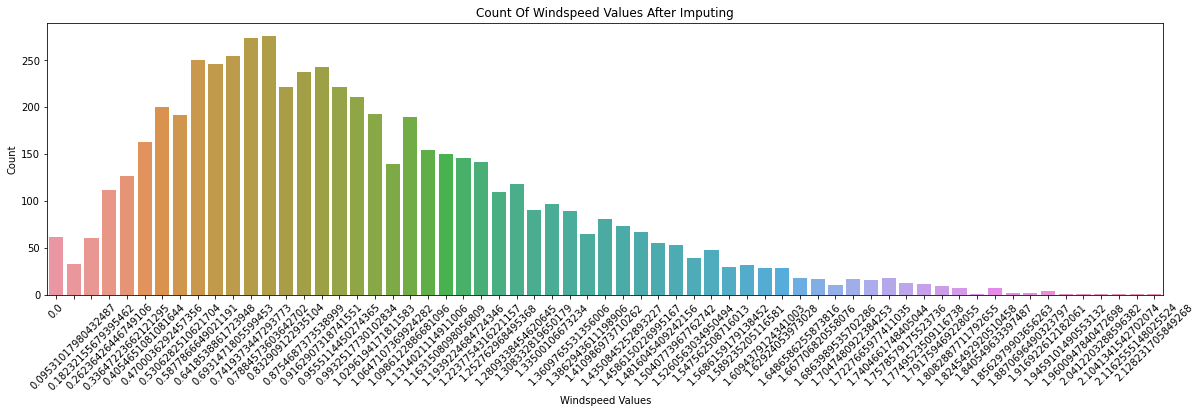

In [18]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
windspeed = pd.DataFrame(df_train["Wind speed (m/s)"].value_counts()).reset_index()
plt.xticks(rotation=45) 
sns.barplot(data=windspeed,x="index",y="Wind speed (m/s)",ax=ax)
ax.set(xlabel='Windspeed Values', ylabel='Count',title="Count Of Windspeed Values After Imputing",label='big')

## <span style='color:#5499C7 '> Rates of rainfall: </span>


- Slight rain: Less than 0.5 mm per hour.
- Moderate rain: Greater than 0.5 mm per hour, but less than 4.0 mm per hour.
- Heavy rain: Greater than 4 mm per hour, but less than 8 mm per hour.
- Very heavy rain: Greater than 8 mm per hour.
- Slight shower: Less than 2 mm per hour.
- Moderate shower: Greater than 2 mm, but less than 10 mm per hour.
- Heavy shower: Greater than 10 mm per hour, but less than 50 mm per hour.
- Violent shower: Greater than 50 mm per hour.


<AxesSubplot:xlabel='index', ylabel='Rainfall(mm)'>

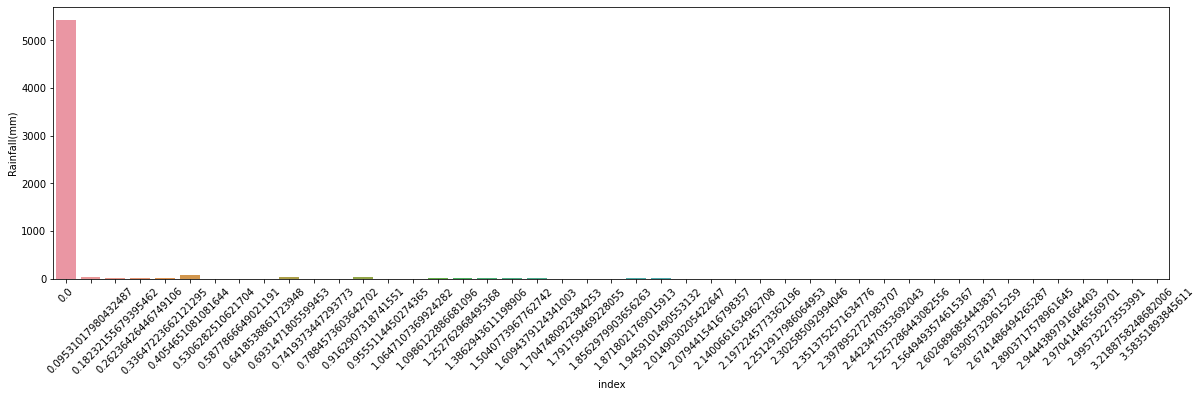

In [19]:

fig,ax= plt.subplots()
fig.set_size_inches(20,5)
Rainfall = pd.DataFrame(df_train["Rainfall(mm)"].value_counts()).reset_index()
plt.xticks(rotation=45) 
sns.barplot(data=Rainfall,x="index",y="Rainfall(mm)",ax=ax)


In [20]:
"""# now change the value of rainfall  to 8 category in train 
df_train.loc[  df_train['Rainfall(mm)']<= 0.1  , 'Rainfall(mm)'] = 0 #no rain
df_train.loc[ (df_train['Rainfall(mm)']>=0.2) & (df_train['Rainfall(mm)']<= 0.4) , 'Rainfall(mm)'] = -1 #Slight shower
df_train.loc[ (df_train['Rainfall(mm)']>=0.5) & (df_train['Rainfall(mm)']<= 2.0) , 'Rainfall(mm)'] = 2 #Slight shower
df_train.loc[ (df_train['Rainfall(mm)']>=2.1) & (df_train['Rainfall(mm)']<= 4.0) , 'Rainfall(mm)'] = 3  #Moderate rain
df_train.loc[ (df_train['Rainfall(mm)']>= 4.1) & (df_train['Rainfall(mm)']<8   ) , 'Rainfall(mm)'] = 4 #Heavy rain
df_train.loc[ (df_train['Rainfall(mm)']>= 8 ) & (df_train['Rainfall(mm)']<10  ) , 'Rainfall(mm)'] = 5 #very Heavy rain
df_train.loc[ (df_train['Rainfall(mm)']>= 10) & (df_train['Rainfall(mm)']<50  ) , 'Rainfall(mm)'] = 6 #Heavy shower
df_train.loc[ (df_train['Rainfall(mm)']>= 50) , 'Rainfall(mm)'] = 7 #Violent shower
df_train.loc[  df_train['Rainfall(mm)']== -1  , 'Rainfall(mm)'] = 1 #Slight shower
df_train['Rainfall(mm)'] = df_train['Rainfall(mm)'].astype(int)
#on test data
# now change the value of rainfall  to 8 category in test 
df_test.loc[  df_test['Rainfall(mm)']<= 0.1  , 'Rainfall(mm)'] = 0 #no rain
df_test.loc[ (df_test['Rainfall(mm)']>=0.2) & (df_test['Rainfall(mm)']<= 0.4) , 'Rainfall(mm)'] = -1 #Slight shower
df_test.loc[ (df_test['Rainfall(mm)']>=0.5) & (df_test['Rainfall(mm)']<= 2.0) , 'Rainfall(mm)'] = 2 #Slight shower
df_test.loc[ (df_test['Rainfall(mm)']>=2.1) & (df_test['Rainfall(mm)']<= 4.0) , 'Rainfall(mm)'] = 3  #Moderate rain
df_test.loc[ (df_test['Rainfall(mm)']>= 4.1) & (df_test['Rainfall(mm)']<8   ) , 'Rainfall(mm)'] = 4 #Heavy rain
df_test.loc[ (df_test['Rainfall(mm)']>= 8 ) & (df_test['Rainfall(mm)']<10  ) , 'Rainfall(mm)'] = 5 #very Heavy rain
df_test.loc[ (df_test['Rainfall(mm)']>= 10) & (df_test['Rainfall(mm)']<50  ) , 'Rainfall(mm)'] = 6 #Heavy shower
df_test.loc[ (df_test['Rainfall(mm)']>= 50) , 'Rainfall(mm)'] = 7 #Violent shower
df_test.loc[  df_test['Rainfall(mm)']== -1  , 'Rainfall(mm)'] = 1 #Slight shower
df_test['Rainfall(mm)'] = df_test['Rainfall(mm)'].astype(int)"""


"# now change the value of rainfall  to 8 category in train \ndf_train.loc[  df_train['Rainfall(mm)']<= 0.1  , 'Rainfall(mm)'] = 0 #no rain\ndf_train.loc[ (df_train['Rainfall(mm)']>=0.2) & (df_train['Rainfall(mm)']<= 0.4) , 'Rainfall(mm)'] = -1 #Slight shower\ndf_train.loc[ (df_train['Rainfall(mm)']>=0.5) & (df_train['Rainfall(mm)']<= 2.0) , 'Rainfall(mm)'] = 2 #Slight shower\ndf_train.loc[ (df_train['Rainfall(mm)']>=2.1) & (df_train['Rainfall(mm)']<= 4.0) , 'Rainfall(mm)'] = 3  #Moderate rain\ndf_train.loc[ (df_train['Rainfall(mm)']>= 4.1) & (df_train['Rainfall(mm)']<8   ) , 'Rainfall(mm)'] = 4 #Heavy rain\ndf_train.loc[ (df_train['Rainfall(mm)']>= 8 ) & (df_train['Rainfall(mm)']<10  ) , 'Rainfall(mm)'] = 5 #very Heavy rain\ndf_train.loc[ (df_train['Rainfall(mm)']>= 10) & (df_train['Rainfall(mm)']<50  ) , 'Rainfall(mm)'] = 6 #Heavy shower\ndf_train.loc[ (df_train['Rainfall(mm)']>= 50) , 'Rainfall(mm)'] = 7 #Violent shower\ndf_train.loc[  df_train['Rainfall(mm)']== -1  , 'Rainfall(mm)'

In [21]:
#df_train["Rainfall(mm)"].value_counts()

[Text(0.5, 0, 'Windspeed Values'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count Of Windspeed Values After Imputing'),
 None]

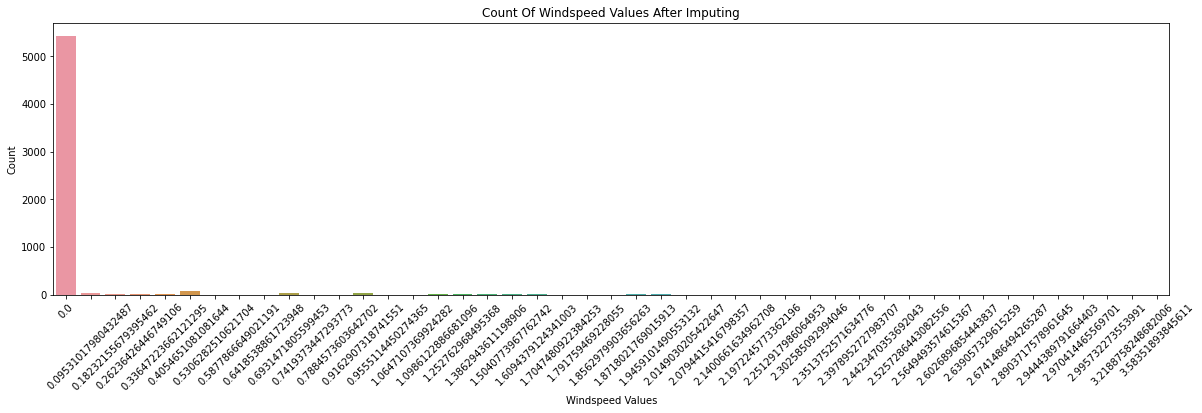

In [22]:

fig,ax= plt.subplots()
fig.set_size_inches(20,5)
Rainfall = pd.DataFrame(df_train["Rainfall(mm)"].value_counts()).reset_index()
plt.xticks(rotation=45) 
sns.barplot(data=Rainfall,x="index",y="Rainfall(mm)",ax=ax)
ax.set(xlabel='Windspeed Values', ylabel='Count',title="Count Of Windspeed Values After Imputing",label='big')

## <span style='color:#5499C7 '> Rates of Snowfall: </span>

Low rate is Less than 0.5 inches per hour  1.27cm

Medium rate is 0.5 to 1.5 inches per hour 3.81cm

High rate is Greater than 1.5 inches per hour

In [23]:

# now change the value of snow  to 3 category in train 
df_train.loc[  df_train['Snowfall (cm)']< 1.27  , 'Snowfall (cm)'] = 1 #low rate
df_train.loc[ (df_train['Snowfall (cm)']>=1.27) & (df_train['Snowfall (cm)']< 3.81) , 'Snowfall (cm)'] = 2 #medium rate
df_train.loc[ df_train['Snowfall (cm)']>=3.81, 'Snowfall (cm)'] = 3 #high rate 
df_train['Snowfall (cm)'] = df_train['Snowfall (cm)'].astype(int)


# now change the value of snow  to 3 category in test 
df_test.loc[  df_test['Snowfall (cm)']< 1.27  , 'Snowfall (cm)'] = 1 #low rate
df_test.loc[ (df_test['Snowfall (cm)']>=1.27) & (df_test['Snowfall (cm)']< 3.81) , 'Snowfall (cm)'] = 2 #medium rate
df_test.loc[ df_test['Snowfall (cm)']>=3.81, 'Snowfall (cm)'] = 3 #high rate 
df_test['Snowfall (cm)'] = df_test['Snowfall (cm)'].astype(int)

 
### <span style='color:#5499C7 '>  Solar Radiation </span>


[Text(0.5, 1.0, 'Solar Radiation during different seasons')]

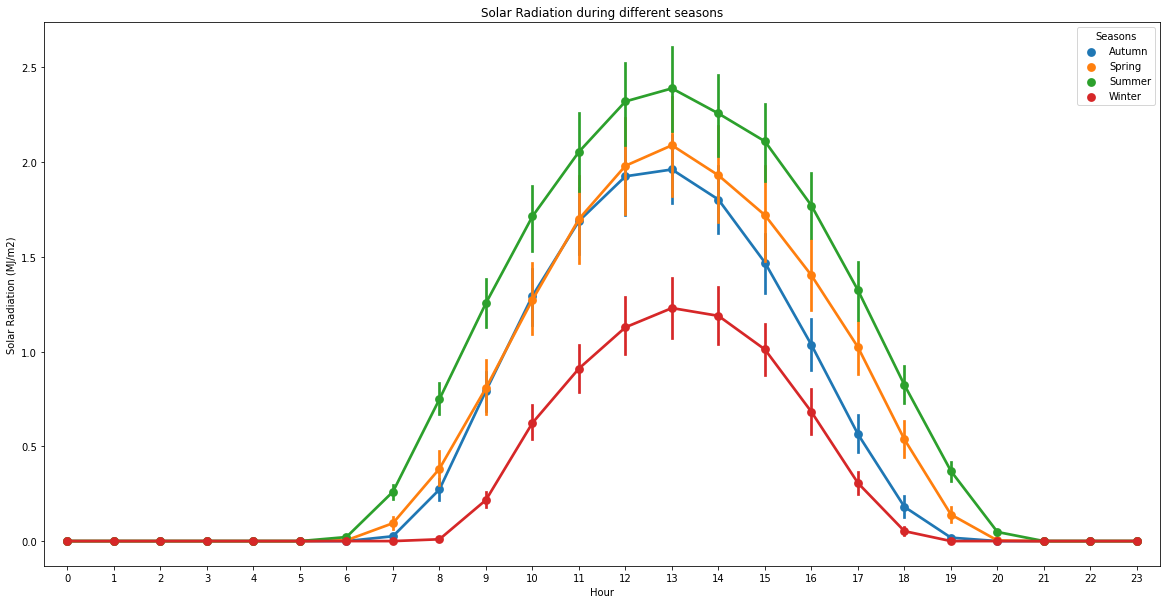

In [24]:
#df_train["Solar Radiation (MJ/m2)"].value_counts()
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_train, x='Hour', y='Solar Radiation (MJ/m2)', hue='Seasons', ax=ax)
ax.set(title='Solar Radiation during different seasons')


[Text(0.5, 1.0, 'Relation between temperature and y')]

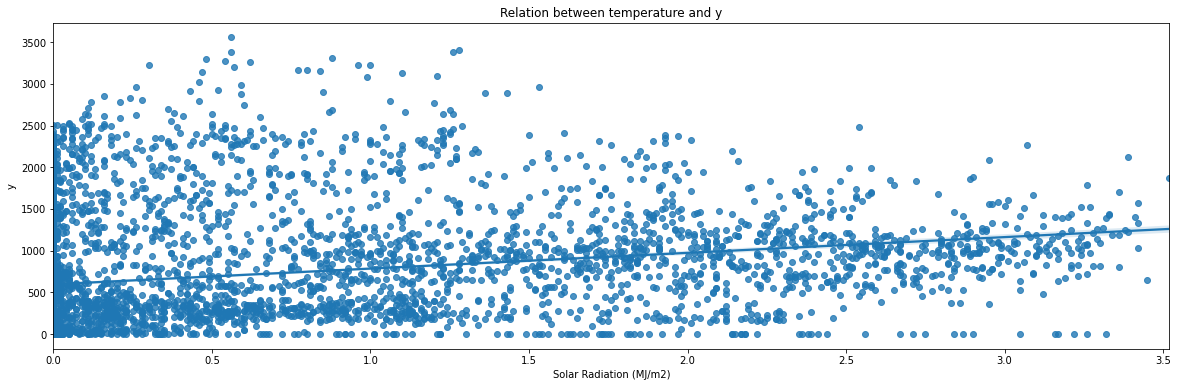

In [25]:

fig, (ax1) = plt.subplots(ncols=1, figsize=(20,6))
sns.regplot(x=df_train['Solar Radiation (MJ/m2)'], y=df_train['y'], ax=ax1)
ax1.set(title="Relation between temperature and y")


In [26]:
df_train.head()

,ID,y,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,month,year
0,0,254,0,-5.2,37,1.163151,7.601402,0.0,0.0,1,Winter,No Holiday,Yes,Friday,December,2017
1,1,204,1,-5.5,38,0.587787,7.601402,0.0,0.0,1,Winter,No Holiday,Yes,Friday,December,2017
2,2,173,2,-6.0,39,0.693147,7.601402,0.0,0.0,1,Winter,No Holiday,Yes,Friday,December,2017
3,3,107,3,-6.2,40,0.641854,7.601402,0.0,0.0,1,Winter,No Holiday,Yes,Friday,December,2017
4,4,78,4,-6.0,36,1.193922,7.601402,0.0,0.0,1,Winter,No Holiday,Yes,Friday,December,2017


In [27]:
df_test.isnull().sum()

ID                         0
Hour                       0
Temperature                0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
weekday                    0
month                      0
year                       0
dtype: int64

 
### <span style='color:#5499C7 '>  Normalize Time Series features  </span>


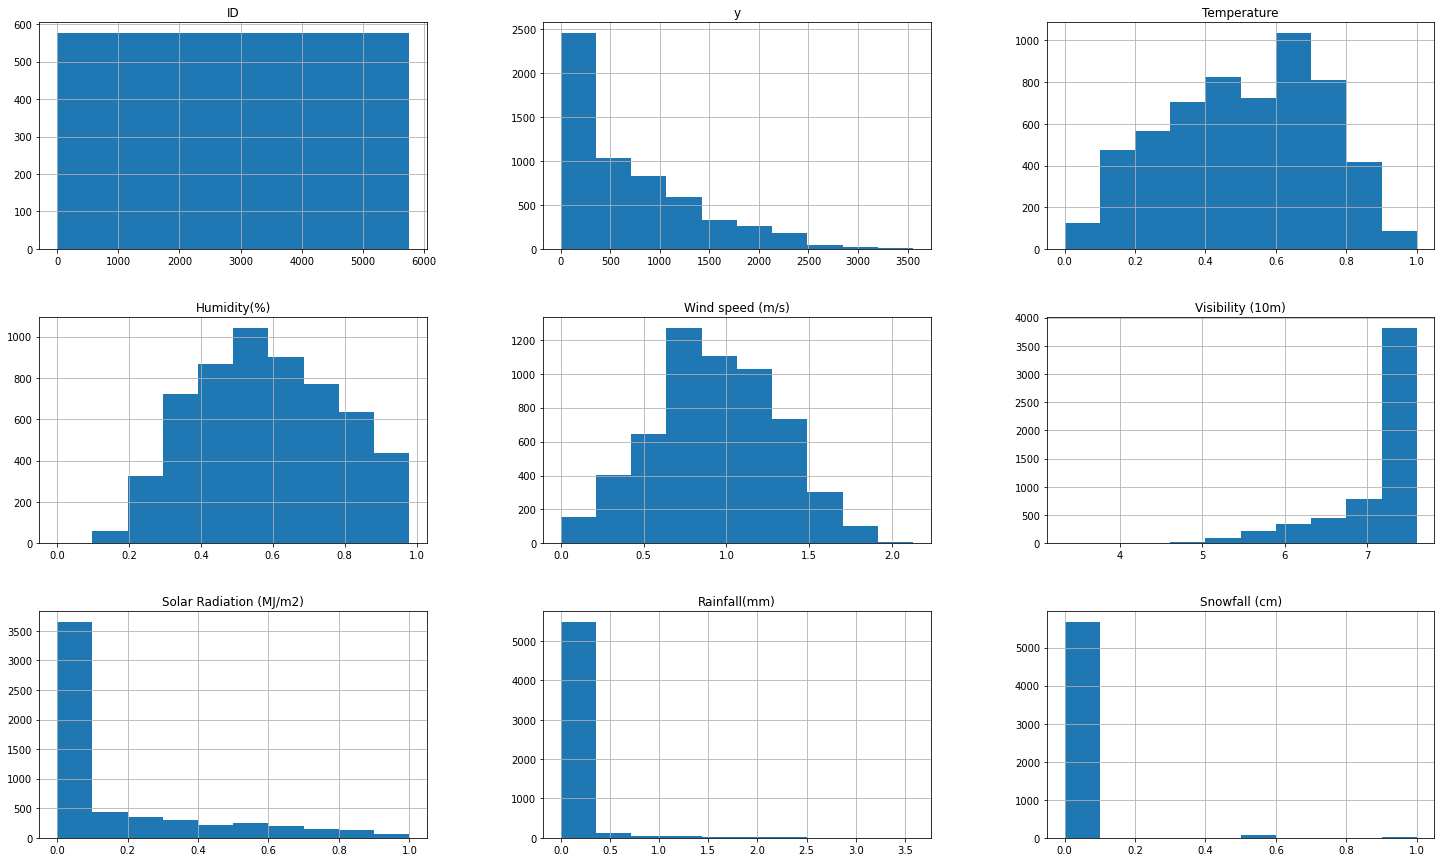

In [28]:
from sklearn.preprocessing import MinMaxScaler

#Normalize Humidity The values are divided to 100 (max)
df_train['Humidity(%)']=df_train['Humidity(%)']/100
df_test['Humidity(%)']=df_test['Humidity(%)']/100

# Normalized temperature are derived via (t-t_min)/(t_max-t_min)
# Normalized visibility are derived via (t-t_min)/(t_max-t_min)
#,'Rainfall(mm)','Wind speed (m/s)','Visibility (10m)'
scaler = MinMaxScaler()
col=['Temperature','Solar Radiation (MJ/m2)','Snowfall (cm)']
df_train[col] = scaler.fit_transform(df_train[col])
df_test[col] = scaler.transform(df_test[col])

df_train.hist(figsize=(25, 15))
plt.show()




[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Box Plot On y Across years')]

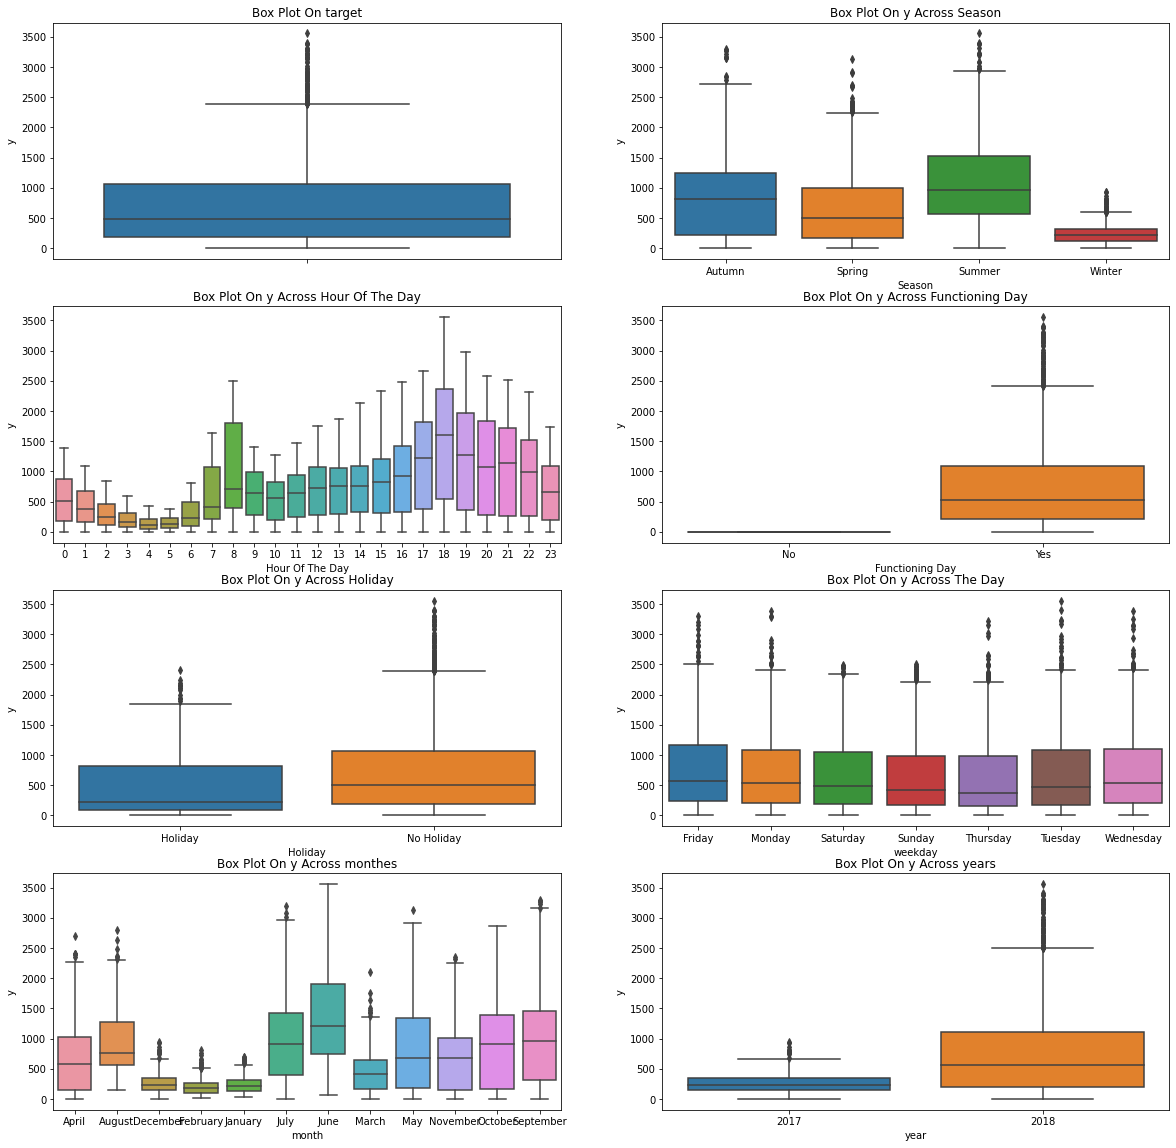

In [29]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 20)
sns.boxplot(data=df_train,y="y",orient="v",ax=axes[0][0])
sns.boxplot(data=df_train,y="y",x="Seasons",orient="v",ax=axes[0][1])
sns.boxplot(data=df_train,y="y",x="Hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df_train,y="y",x="Functioning Day",orient="v",ax=axes[1][1])
sns.boxplot(data=df_train,y="y",x="Holiday",orient="v",ax=axes[2][0])
sns.boxplot(data=df_train,y="y",x="weekday",orient="v",ax=axes[2][1])
sns.boxplot(data=df_train,y="y",x="month",orient="v",ax=axes[3][0])
sns.boxplot(data=df_train,y="y",x="year",orient="v",ax=axes[3][1])


axes[0][0].set(ylabel='y',title="Box Plot On target")
axes[0][1].set(xlabel='Season', ylabel='y',title="Box Plot On y Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='y',title="Box Plot On y Across Hour Of The Day")
axes[1][1].set(xlabel='Functioning Day', ylabel='y',title="Box Plot On y Across Functioning Day")
axes[2][0].set(xlabel='Holiday', ylabel='y',title="Box Plot On y Across Holiday")
axes[2][1].set(xlabel='weekday', ylabel='y',title="Box Plot On y Across The Day")
axes[3][0].set(xlabel='month', ylabel='y',title="Box Plot On y Across monthes")
axes[3][1].set(xlabel='year', ylabel='y',title="Box Plot On y Across years")


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


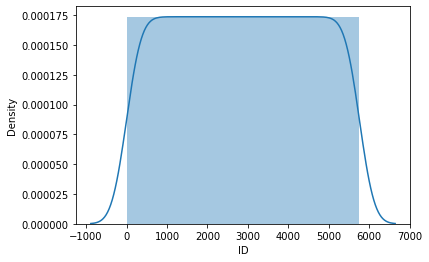

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


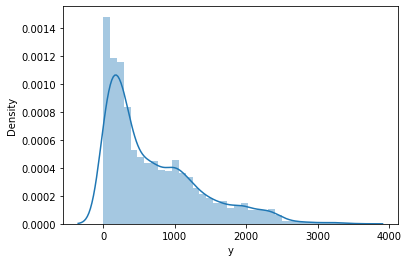

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


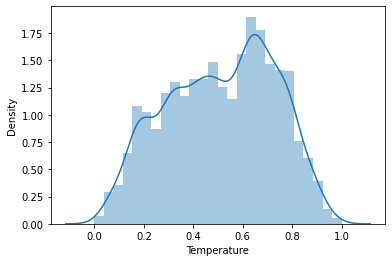

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


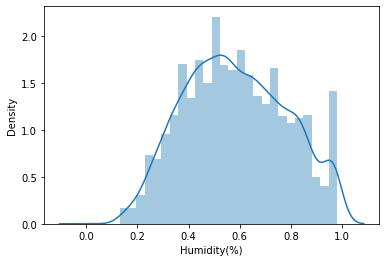

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


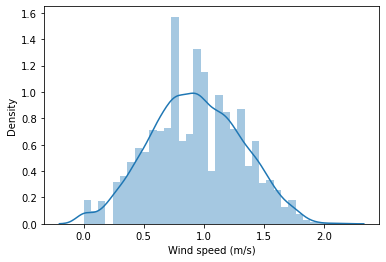

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


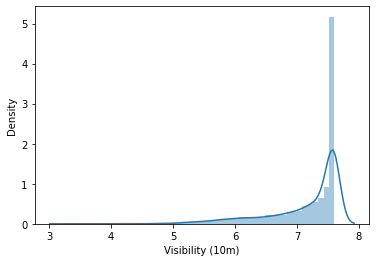

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


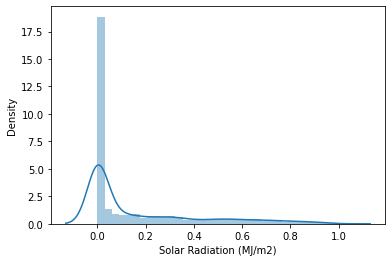

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


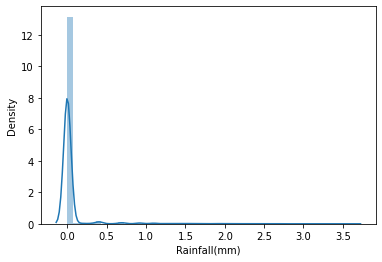

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


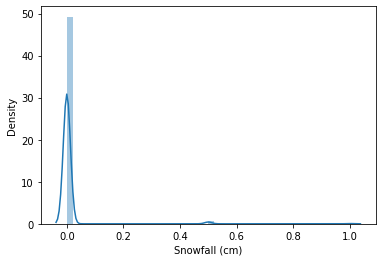

In [30]:
# If distrubution is skewed , better to use log transform
b_to_log = df_train.select_dtypes(include=np.number).columns.tolist()
for colname in b_to_log:
    sns.distplot(df_train[colname], kde=True)
    plt.show()

<AxesSubplot:>

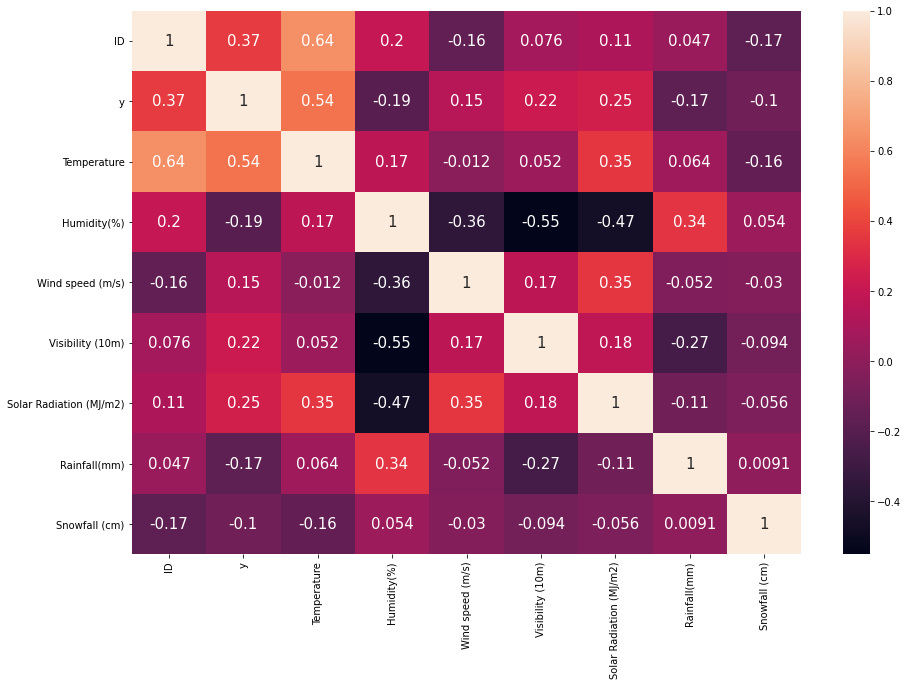

In [31]:

corr = df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

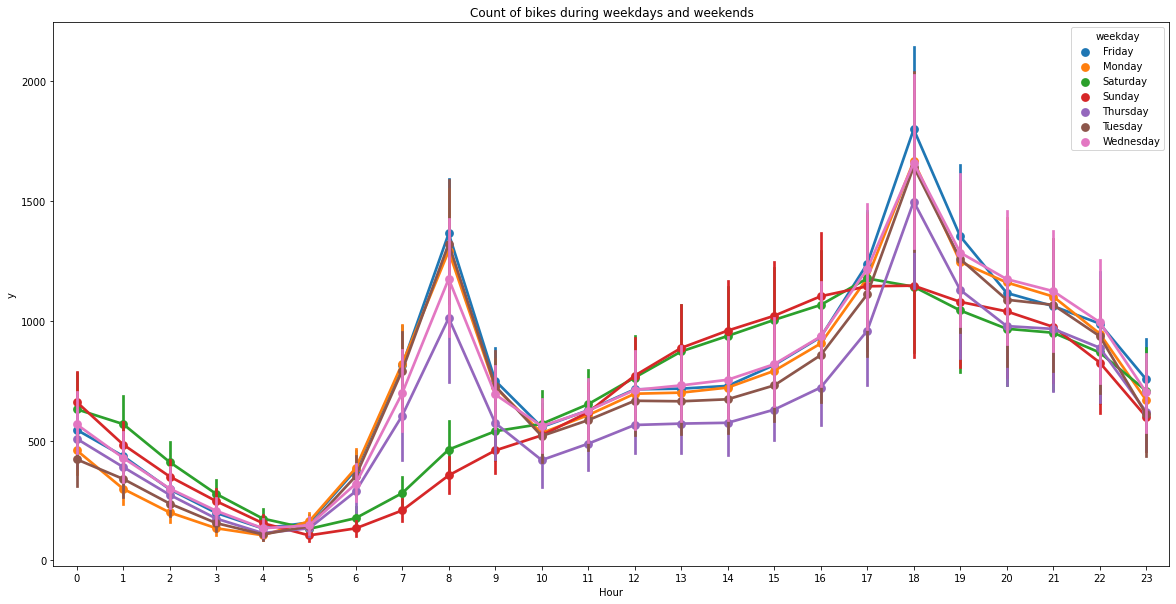

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_train, x='Hour', y='y', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

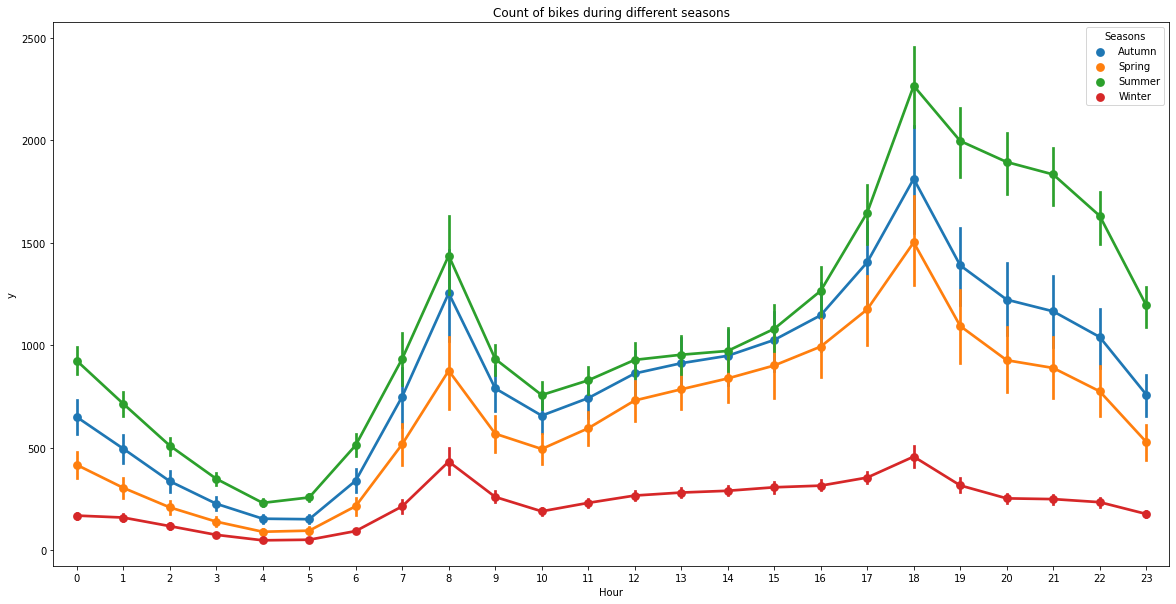

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_train, x='Hour', y='y', hue='Seasons', ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Relation between Wind speed and y')]

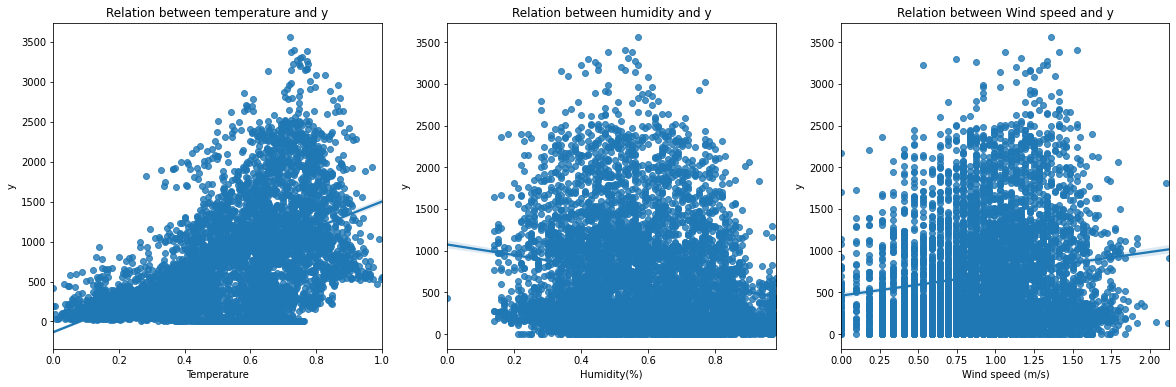

In [34]:
#Hour Temperature Humidity(%) Wind speed (m/s) Visibility (10m) 
#Dptempe Solar Radiation (MJ/m2) Rainfall(mm) Snowfall (cm)
#Seasons	Holiday	Functioning Day	weekday	month

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df_train['Temperature'], y=df_train['y'], ax=ax1)
ax1.set(title="Relation between temperature and y")
sns.regplot(x=df_train['Humidity(%)'], y=df_train['y'], ax=ax2)
ax2.set(title="Relation between humidity and y")
sns.regplot(x=df_train['Wind speed (m/s)'], y=df_train['y'],ax=ax3)
ax3.set(title="Relation between Wind speed and y")

## y destribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


[Text(0.5, 1.0, 'Theoritical quantiles')]

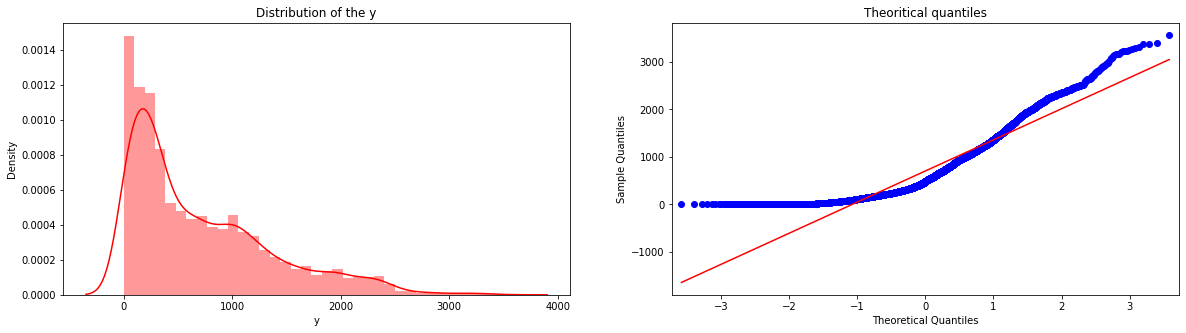

In [35]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(df_train['y'], ax=ax1 , color ='red')
ax1.set(title='Distribution of the y')
qqplot(df_train['y'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

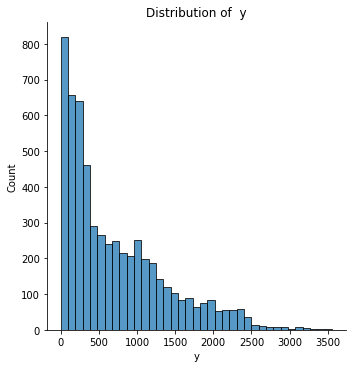

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Theoritical quantiles')

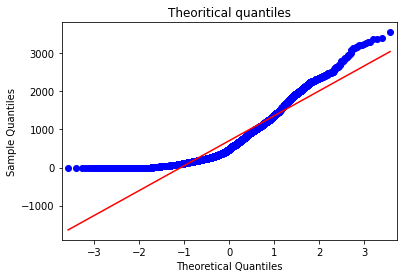

In [36]:

from statsmodels.graphics.gofplots import qqplot

sns.displot(df_train['y'], kde = False)
plt.title("Distribution of  y")
plt.show()

qqplot(df_train['y'], line='s')
ax2.set(title='Theoritical quantiles')
plt.title("Theoritical quantiles")





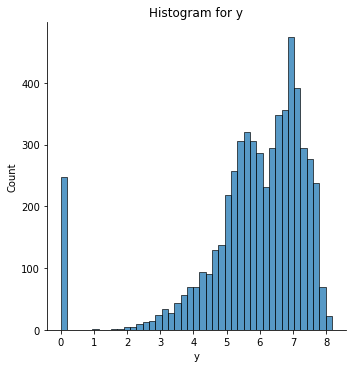

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Theoritical quantiles')

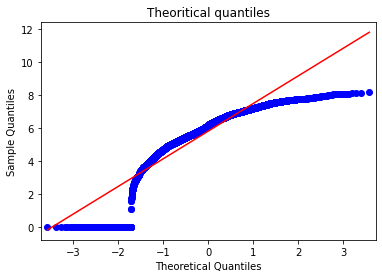

In [37]:
from statsmodels.graphics.gofplots import qqplot

#df_train['y'] =np.cbrt(df_train['y'])

df_train['y'] =np.log1p(df_train['y'])
#df_train['y']=df_train['y']+1
#df_train['y'] =np.log10(df_train['y'])
sns.displot(df_train['y'], kde = False)
plt.title("Histogram for y")
plt.show()


qqplot(df_train['y'], line='s')
ax2.set(title='Theoritical quantiles')
plt.title("Theoritical quantiles")


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


[Text(0.5, 1.0, 'Theoritical quantiles')]

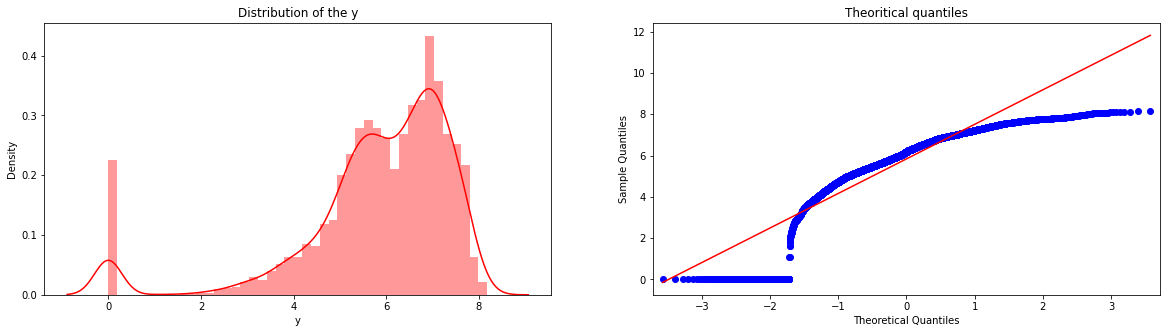

In [38]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(df_train['y'], ax=ax1 , color ='red')
ax1.set(title='Distribution of the y')
qqplot(df_train['y'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [39]:
df_train.head()

,ID,y,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,month,year
0,0,5.541264,0,0.181651,0.37,1.163151,7.601402,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
1,1,5.323010,1,0.176147,0.38,0.587787,7.601402,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
2,2,5.159055,2,0.166972,0.39,0.693147,7.601402,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
3,3,4.682131,3,0.163303,0.40,0.641854,7.601402,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
4,4,4.369448,4,0.166972,0.36,1.193922,7.601402,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017


In [40]:
df_train.nunique()

ID                         5760
y                          1890
Hour                         24
Temperature                 515
Humidity(%)                  86
Wind speed (m/s)             63
Visibility (10m)           1584
Solar Radiation (MJ/m2)     340
Rainfall(mm)                 45
Snowfall (cm)                 3
Seasons                       4
Holiday                       2
Functioning Day               2
weekday                       7
month                        12
year                          2
dtype: int64

### change Holiday and Functioning Day to int 

In [41]:
df_train["Functioning Day"].replace({"Yes": 1, "No": 0}, inplace=True)
df_train["Holiday"].replace({"Holiday": 1, "No Holiday": 0}, inplace=True)

df_test["Functioning Day"].replace({"Yes": 1, "No": 0}, inplace=True)
df_test["Holiday"].replace({"Holiday": 1, "No Holiday": 0}, inplace=True)


In [42]:
df_train['Functioning Day'] = df_train['Functioning Day'].astype(int)
df_train['Holiday'] = df_train['Holiday'].astype(int)

df_test['Holiday'] = df_test['Holiday'].astype(int)
df_test['Functioning Day'] = df_test['Functioning Day'].astype(int)

## One hot Encoding

In [43]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ["Hour","Seasons","weekday","month","year"]

for col in cols:
    df_train = one_hot_encoding(df_train, col)
    df_test  = one_hot_encoding(df_test, col)


In [44]:
df_train.head()

,ID,y,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2017,year_2018
0,0,5.541264,0.181651,0.37,1.163151,7.601402,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,5.323010,0.176147,0.38,0.587787,7.601402,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,5.159055,0.166972,0.39,0.693147,7.601402,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,3,4.682131,0.163303,0.40,0.641854,7.601402,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,4,4.369448,0.166972,0.36,1.193922,7.601402,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [45]:
df_test.head()

,ID,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2017,year_2018
0,5760,0.253211,0.90,1.098612,5.560682,0.0,0.0,0.5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,5761,0.244037,0.90,0.955511,5.575949,0.0,0.0,0.5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,5762,0.236697,0.88,0.875469,5.855072,0.0,0.0,0.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,5763,0.223853,0.89,0.832909,5.666427,0.0,0.0,0.5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,5764,0.211009,0.91,0.788457,5.488938,0.0,0.0,0.5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


 
# <span style='color:#5499C7 '> MODEL TRAINING  </span>



In [46]:
df_train= df_train.drop(['Solar Radiation (MJ/m2)'],axis=1)
df_test= df_test.drop(['Solar Radiation (MJ/m2)'],axis=1)

In [47]:
X =df_train.drop(columns=['ID','y'])

y =df_train['y']

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV,Lasso,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC,SVC

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 


In [49]:
models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [50]:
from sklearn import model_selection

In [51]:
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [52]:
for model in models:
    train(model)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: LinearRegression()
CV score: 6.053627487322837e+24
Model: Ridge()
CV score: 0.39181993394515335


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3

Model: HuberRegressor()
CV score: nan
Model: ElasticNetCV()
CV score: 0.4064937677554539


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: DecisionTreeRegressor()
CV score: 0.548755821833645


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: RandomForestRegressor()
CV score: 0.3378473311032252


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: ExtraTreesRegressor()
CV score: 0.30702245709283915


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: GradientBoostingRegressor()
CV score: 0.345625683448347


In [53]:
start =0 

df1 = pd.DataFrame(columns =df_train.columns )
df2 = pd.DataFrame(columns =df_train.columns )


In [54]:

for i in range (0,12):
    Vstart = (15*24)+(24*20*i)
    Vend = (20*24)*(i+1) #till befor this number
    Tstart= i*20*24
    Tend= (15*24)+Tstart #till befor this number
    X_train = df_train[Tstart:Tend]
    X_val = df_train[Vstart:Vend ]
    df1=df1.append(X_train)
    df2=df2.append(X_val)
    
X_train =df1
X_val=df2

#### Train and validator Split

In [55]:
y_train = X_train['y']
X_train = X_train.drop(columns=['ID', 'y'])

y_val = X_val['y']
X_val = X_val.drop(columns=['ID', 'y'])


X_test = df_test.drop(columns=['ID'])

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)


(4320, 57) (4320,)
(1440, 57) (1440,)


In [56]:
model = RandomForestRegressor()

In [57]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
y_pred = model.predict(X_val)
y_pred[y_pred <= 0] = 0

In [59]:
error = y_val - y_pred

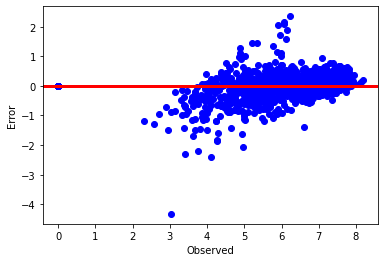

In [60]:
fig, ax = plt.subplots()
ax.scatter(y_val, error ,color = 'blue')
ax.axhline(lw=3, color='red')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
print('-'*10+'RandomForestRegressor'+'-'*10)
print('R square: ',r2_score(y_val, y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_val, y_pred))
print('RMSLE : ',mean_squared_log_error(y_val, y_pred))

----------RandomForestRegressor----------
R square:  0.9204671863549444
Mean Absolute Error:  0.2795872759508184
RMSLE :  0.004976122636145351


In [62]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)

gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_val)
y_pred[y_pred <= 0] = 0
print('-'*10+'GBR'+'-'*10)
print('R square: ',r2_score(y_val, y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_val, y_pred))
print('RMSLE : ',mean_squared_log_error(y_val, y_pred))

----------GBR----------
R square:  0.9335122228691363
Mean Absolute Error:  0.24610263603141008
RMSLE :  0.009173234669654804


In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas=[1e-9,1e-8,1e-7,1e-6]

ridgecv_reg= make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(X_train, y_train)
y_pred = ridgecv_reg.predict(X_val)
y_pred[y_pred <= 0] = 0
print('-'*10+'RidgeCV'+'-'*10)
print('R square: ',r2_score(y_val, y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_val, y_pred))
print('RMSLE : ',mean_squared_log_error(y_val, y_pred))


----------RidgeCV----------
R square:  0.8927514252007958
Mean Absolute Error:  0.36032249181289805
RMSLE :  0.01575111006334991


In [64]:
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators='warn',
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)


etr.fit(X_train, y_train)
y_pred = etr.predict(X_val)
y_pred[y_pred <= 0] = 0
print('-'*10+'ExtraTreesRegressor'+'-'*10)
print('R square: ',r2_score(y_val, y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_val, y_pred))
print('RMSLE : ',mean_squared_log_error(y_val, y_pred))


----------ExtraTreesRegressor----------
R square:  0.9401197392824548
Mean Absolute Error:  0.23188227511068576
RMSLE :  0.003798662178661286


In [65]:


from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
y_pred = kn.predict(X_val)
y_pred[y_pred <= 0] = 0
print('-'*10+'KNeighborsRegressor'+'-'*10)
print('R square: ',r2_score(y_val, y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_val, y_pred))
print('RMSLE : ',mean_squared_log_error(y_val, y_pred))



----------KNeighborsRegressor----------
R square:  0.23879803159162916
Mean Absolute Error:  0.7093376200861081
RMSLE :  0.14052928084397812


# Predictions on test set and generating submission file

In [66]:
y_test_pred = gb_reg.predict(X_test)
y_test_pred = np.expm1(y_test_pred)
#_test_pred = (10**y_test_pred)
#_test_pred=y_test_pred-1
y_test_pred[y_test_pred <= 0] = 0
df_test['y'] = y_test_pred

df_test.head(20)

,ID,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2017,year_2018,y
0,5760,0.253211,0.90,1.098612,5.560682,0.0,0.5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,158.405386
1,5761,0.244037,0.90,0.955511,5.575949,0.0,0.5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,134.120537
2,5762,0.236697,0.88,0.875469,5.855072,0.0,0.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,98.058310
3,5763,0.223853,0.89,0.832909,5.666427,0.0,0.5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,79.608996
4,5764,0.211009,0.91,0.788457,5.488938,0.0,0.5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,45.165532
5,5765,0.198165,0.91,0.916291,5.455321,0.0,0.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,48.007834
6,5766,0.188991,0.91,0.741937,5.587249,0.0,0.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,85.378679
7,5767,0.179817,0.90,0.741937,5.743003,0.0,0.5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,157.137242
8,5768,0.174312,0.89,0.641854,5.918894,0.0,0.5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,298.435452
9,5769,0.179817,0.88,0.336472,6.139885,0.0,0.5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,204.376181


In [67]:
df_test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)